# [실습1] 텍스트 전처리 실습

In [1]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
 !pip install konlpy

In [3]:
from nltk.tokenize import sent_tokenize

In [4]:
para = "Hello everyone. It's good to see you. Let's start our text mining class!"
print(sent_tokenize(para))

['Hello everyone.', "It's good to see you.", "Let's start our text mining class!"]


In [5]:
from nltk.tokenize import word_tokenize

In [6]:
para = "Hello everyone. It's good to see you. Let's start our text mining class!"
print(word_tokenize(para))

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']


In [7]:
import re

In [8]:
re.findall("[abd]", "How are you, boy?")

['a', 'b']

In [9]:
re.findall("[0123456789]", "3a7b5c9d")

['3', '7', '5', '9']

In [10]:
# 정규표현식을 이용한 간편한 토큰화
from nltk.tokenize import RegexpTokenizer

In [11]:
text1 = "Sorry I can't go there"
tokenizer = RegexpTokenizer("[\w]{3,}") # 문자,숫자,언더바, 아포스트로피로 이루어진 3자 이상 어
print(tokenizer.tokenize(text1.lower()))

['sorry', 'can', 'there']


# 불용어제거

In [12]:
from nltk.corpus import stopwords # NLTK 제공 불용어 사진
# 영어 불용어만 가지고 와서 set을 이용해 중복을 제거

In [13]:
english_stops = set(stopwords.words('english'))
text1 = "Sorry, I couldn't go to movie yesterday"
tokens = word_tokenize(text1.lower())

In [14]:
# stopwords 를 제외한 단어들만으로 list 를 생성
tokens = [word for word in tokens if word not in english_stops]
print(tokens)

['sorry', ',', 'could', "n't", 'go', 'movie', 'yesterday']


In [15]:
# 자신만의 불용어 사전 생성
my_stops = ['could','n\t']
tokens = [word for word in tokens if word not in my_stops]
print(tokens)

['sorry', ',', "n't", 'go', 'movie', 'yesterday']


# 어간추출(STEMMING)

In [16]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookeri cookbook


# 표제어 추출(Lemmatization)

In [17]:
from nltk.stem import WordNetLemmatizer

In [18]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'), lemmatizer.lemmatize('cooking', pos = 'v'))
print(lemmatizer.lemmatize('cookery'), lemmatizer.lemmatize('cookbookds'))

cooking cook
cookery cookbookds


# 품사태깅

In [19]:
import nltk
from nltk.tokenize import word_tokenize
tokens = word_tokenize("Hello everyone. It's good to see you. Let's start our text mining class !")
print(nltk.pos_tag(tokens))

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('!', '.')]


In [20]:
# 언하는 품사의 단어들만 추출
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']


In [21]:
# 단어에 품사 정보를 추가해 구분

In [22]:
words_with_tag = ['/'.join(item) for item in nltk.pos_tag(tokens)]
print(words_with_tag)

['Hello/NNP', 'everyone/NN', './.', 'It/PRP', "'s/VBZ", 'good/JJ', 'to/TO', 'see/VB', 'you/PRP', './.', 'Let/VB', "'s/POS", 'start/VB', 'our/PRP$', 'text/NN', 'mining/NN', 'class/NN', '!/.']


In [23]:
import sys

In [24]:
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [25]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [26]:
from konlpy.tag import Okt

In [27]:
t = Okt()

sentence = "절망의 반대가 희망은 아니다."
print(t.morphs(sentence))
print(t.nouns(sentence))
print(t.pos(sentence))

['절망', '의', '반대', '가', '희망', '은', '아니다', '.']
['절망', '반대', '희망']
[('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation')]


# [실습2] 그래프와 워드클라우드 이해 실습

In [28]:
import nltk
nltk.download('gutenberg') #다운로드 구텐베르크 프로젝트. 이상한나라의 앨리스 포함
from nltk.corpus import gutenberg
file_names = gutenberg.fileids()
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [29]:
from nltk.tokenize import word_tokenize
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('Length of document :', len(doc_alice))
tokens_alice = word_tokenize(doc_alice) # word_tokenize() 로 토큰화 진행
print('Num of tokens used:', len(tokens_alice))

Length of document : 144395
Num of tokens used: 33494


In [30]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
print(stem_tokens_alice[:10])

['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865']


In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]
print(lem_tokens_alice[:10])

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865']


In [32]:
from nltk.tokenize import RegexpTokenizer
# 세 문자 이상의 단어만 추출
tokenizer = RegexpTokenizer("[\w']{3,}")
# 소문자로 변환 후에 토큰화 시행
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
# 토큰의 수와 앞 10개의 토큰을 출력해서 확인
print("Num of tokens with RegexTokenizer :", len(reg_tokens_alice))
print('Token sample :')
print(reg_tokens_alice[:10])

Num of tokens with RegexTokenizer : 21616
Token sample :
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit']


In [33]:
from nltk.corpus import stopwords
set(stopwords.words('english'))
result_alice = [word for word in reg_tokens_alice if word not in english_stops]
print('Num of tokens after stopword elimination:', len(result_alice))
print('Token Sample : ')
print(result_alice[:10])

Num of tokens after stopword elimination: 12999
Token Sample : 
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice']


In [34]:
# 단어별 빈도를 담을 딕셔너리 생성
alice_word_count = dict()
for word in result_alice : #모든 토큰에 대해서 
    # 단어가 아직 딕셔너리에 없으면 1, 있으면 기존값에 대해 1을 더해서 저장
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
    
# 빈도를 key 로 하여 단어를 빈도 역순으로 정렬
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get,reverse = True)

In [35]:
print("Top 20 high frequency words :")
for key in sorted_word_count[:20] : #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)} : {alice_word_count[key]}', end =', ')

Top 20 high frequency words :
'said' : 462, 'alice' : 385, 'little' : 128, 'one' : 98, 'know' : 88, 'like' : 85, 'went' : 83, 'would' : 78, 'could' : 77, 'thought' : 74, 'time' : 71, 'queen' : 68, 'see' : 67, 'king' : 61, 'began' : 58, 'turtle' : 57, "'and" : 56, 'way' : 56, 'mock' : 56, 'quite' : 55, 

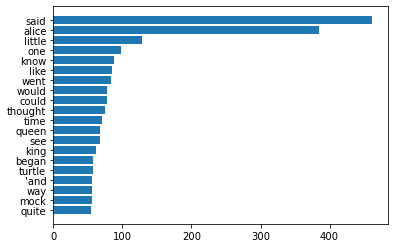

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# 빈도수 상위 20개의 단어를 추출해서 역순ㄴ으로 정렬
n = sorted_word_count[:20][::-1]
# 20개의 단어에 대한 빈도
w = [alice_word_count[key] for key in n]
#수평 막대 그래프
plt.barh(range(len(n)),w,tick_label=n)
plt.show()

In [37]:
! pip install wordcloud

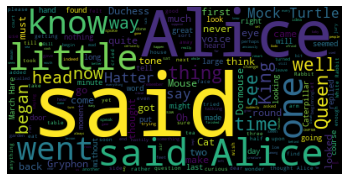

In [38]:
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [39]:
!pip install pyldavis

In [40]:
import numpy as np 
from PIL import Image 
# 배경이미지를 불러와서 넘파이 array로 변환 
alice_mask = np.array(Image.open("./data/alice_mask.png")) 
wc = WordCloud(background_color="white", # 배경색 지정 
            max_words=30, # 출력할 최대 단어 수 
            mask=alice_mask, # 배경으로 사용할 이미지 
            contour_width=3, # 테두리 굵기 
            contour_color='steelblue') # 테두리 색 
wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성 
wc.to_file("alice.png") # 필요한 경우 결과를 이미지 파일로 저장 
# 화면에 결과를 출력 
plt.axis("off") 
plt.imshow(wc) 
plt.show() 

FileNotFoundError: [Errno 2] No such file or directory: './data/alice_mask.png'

In [41]:
from konlpy.corpus import kolaw
# NLTK 와 유사한 방법으로 헌법 텍스트 가져옴
const_doc = kolaw.open('constitution.txt').read()
print(type(const_doc))
print(len(const_doc))

<class 'str'>
18884


In [42]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.nouns(const_doc)
# 형태소단위로 토큰화 후 명사만 추출, 한 글자로 된 토큰은 제외한다.
tokens_const = [token for token in tokens_const if len(token) > 1]
print('토큰의수  : ', len(tokens_const))
print('앞 10개의 토큰')
print(tokens_const[:10])

토큰의수  :  3013
앞 10개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']


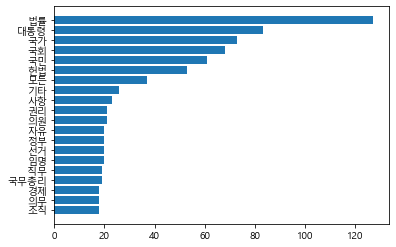

In [43]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
const_word_count  = dict()
for word in tokens_const :
    const_word_count[word]  = const_word_count.get(word, 0) + 1
sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse = True)

n=sorted_word_count[:20][::-1]
w = [const_word_count[key] for key in n]
plt.barh(range(len(n)), w, tick_label=n)
plt.show()

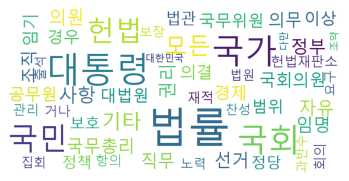

In [44]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800,
    height = 400,
    background_color = 'white',
    max_words = 50)

wordcloud.generate_from_frequencies(const_word_count)
wordcloud.to_file("const.png") # 생성한 이미지를 파일로 저장
plt.axis('off')
plt.imshow(wordcloud)
plt.show()